In [4]:
import tensorflow as tf
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import to_categorical

from keras.utils import pad_sequences
from keras import models
from keras import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.metrics import AUC
from keras.regularizers import L1
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup 
import re

RANDOM_STATE = 42

print('Cuda version: ' + tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Cuda version: 2.16.1
Num GPUs Available:  0


In [2]:
tf.__version__

'2.16.1'

In [3]:
import openpyxl
import string

# Открываем файл Excel
workbook = openpyxl.load_workbook('data.xlsx')

# Выбираем активный лист
sheet = workbook.active

# Проходимся по всем ячейкам в листе
for row in sheet.iter_rows():
    for cell in row:
        # Проверяем, является ли значение ячейки строкой
        if isinstance(cell.value, str):
            # Удаляем знаки препинания из строки
            cell.value = ''.join(char for char in cell.value if char not in string.punctuation)

# Сохраняем изменения в файл
workbook.save('your_updated_file.xlsx')


KeyboardInterrupt: 

In [ ]:

file_path_test ="./data2.csv"
data_test = pd.read_csv(file_path_test, encoding='cp1251', )



In [ ]:
data_test.head()

,output
0,Конечно я хочу чтобы мир был лучше Но я верю ч...
1,Я не очень хорошо знаю Мальдивы но в среднем И...
2,Пахра — река Москвы и Московской области правы...
3,Так какой княжескийто Князейто было много
4,Да они очень активно делятся своей верой и поо...


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448473 entries, 0 to 448472
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   output  448473 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [ ]:

for column in data_test.columns:
   nan_finder = data_test[column].isna().any()
   print(f"nan: {column}: {nan_finder}")
# Данных много и невсем понятно есть ли данные с nan 

nan: output: False


In [ ]:
import spacy

# Загрузка модели языка
nlp = spacy.load("ru_core_news_sm")




In [ ]:
# Функция для предобработки текста и векторизации
def preprocess_text(text):
    # Приведение к нижнему регистру и удаление пунктуации
    doc = nlp(text.lower())
    # Удаление стоп-слов и токенизация
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens

# Применение предобработки текста к каждой строке в датасете
data_test['tokens'] = data_test['output'].apply(preprocess_text)

In [ ]:
data_test

,output,tokens
0,Конечно я хочу чтобы мир был лучше Но я верю ч...,"[мир, лучше, верю, путем, вдохновения, музыку,..."
1,Я не очень хорошо знаю Мальдивы но в среднем И...,"[знаю, мальдивы, среднем, индийский, океан, чи..."
2,Пахра — река Москвы и Московской области правы...,"[пахра, река, москвы, московской, области, пра..."
3,Так какой княжескийто Князейто было много,"[княжескийто, князейто]"
4,Да они очень активно делятся своей верой и поо...,"[активно, делятся, верой, поощряют, прихожан, ..."
...,...,...
448468,Конечно это очень интересная тема Пирамиды в Г...,"[интересная, тема, пирамиды, гизе, являются, и..."
448469,Они уже забыли что их тело священный храм а п...,"[забыли, тело, , священный, храм, пища, , эн..."
448470,Это не только поможет тебе открыть новые гастр...,"[поможет, открыть, новые, гастрономические, го..."
448471,Какую музыку вы любите,"[какую, музыку, любите]"


In [ ]:
data_test.to_csv('dataset_token.csv', index=False)  

NameError: name 'data_test' is not defined

In [ ]:
import pandas as pd
file_path_test ="./dataset_token.csv"
data = pd.read_csv(file_path_test, encoding='utf-8')

In [ ]:
data.head()

,output,tokens
0,Конечно я хочу чтобы мир был лучше Но я верю ч...,"['мир', 'лучше', 'верю', 'путем', 'вдохновения..."
1,Я не очень хорошо знаю Мальдивы но в среднем И...,"['знаю', 'мальдивы', 'среднем', 'индийский', '..."
2,Пахра — река Москвы и Московской области правы...,"['пахра', 'река', 'москвы', 'московской', 'обл..."
3,Так какой княжескийто Князейто было много,"['княжескийто', 'князейто']"
4,Да они очень активно делятся своей верой и поо...,"['активно', 'делятся', 'верой', 'поощряют', 'п..."


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import choice
from tensorflow.keras.preprocessing.text import Tokenizer
from concurrent.futures import ThreadPoolExecutor


# Создание столбца с рандомными personality_types
personality_types = ["меланхолик", "сангвиник", "холерик", "флегматик"]
data['personality'] = np.random.choice(personality_types, size=len(data))

# Функция для токенизации текста
def tokenize_text(text):
    tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
    tokenizer.fit_on_texts([text])
    sequence = tokenizer.texts_to_sequences([text])
    return sequence[0]

# Параметры для токенизации
max_len = 50
max_words = 10000

# Обработка текста в нескольких потоках
with ThreadPoolExecutor(max_workers=100) as executor:
    sequences = list(executor.map(tokenize_text, data['output']))

# Добавление токенизированных данных в датасет
data['tokenized_reviews'] = sequences



In [ ]:
data

,output,tokens,personality,tokenized_reviews
0,Конечно я хочу чтобы мир был лучше Но я верю ч...,"['мир', 'лучше', 'верю', 'путем', 'вдохновения...",флегматик,"[2, 1, 3, 4, 5, 6, 7, 8, 1, 9, 10, 11, 12, 13,..."
1,Я не очень хорошо знаю Мальдивы но в среднем И...,"['знаю', 'мальдивы', 'среднем', 'индийский', '...",флегматик,"[2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 1, 12]"
2,Пахра — река Москвы и Московской области правы...,"['пахра', 'река', 'москвы', 'московской', 'обл...",сангвиник,"[4, 2, 11, 24, 3, 12, 25, 26, 27, 28, 29, 13, ..."
3,Так какой княжескийто Князейто было много,"['княжескийто', 'князейто']",флегматик,"[1, 2, 3, 4, 5, 6]"
4,Да они очень активно делятся своей верой и поо...,"['активно', 'делятся', 'верой', 'поощряют', 'п...",меланхолик,"[9, 10, 2, 11, 12, 13, 14, 3, 15, 4, 16, 17, 5..."
...,...,...,...,...
448468,Конечно это очень интересная тема Пирамиды в Г...,"['интересная', 'тема', 'пирамиды', 'гизе', 'яв...",сангвиник,"[11, 12, 13, 14, 15, 2, 1, 4, 5, 16, 3, 6, 17,..."
448469,Они уже забыли что их тело священный храм а п...,"['забыли', 'тело', ' ', 'священный', 'храм', '...",флегматик,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
448470,Это не только поможет тебе открыть новые гастр...,"['поможет', 'открыть', 'новые', 'гастрономичес...",сангвиник,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 13, 14..."
448471,Какую музыку вы любите,"['какую', 'музыку', 'любите']",сангвиник,"[1, 2, 3, 4]"


In [ ]:
data.to_csv('dataset_token_labels.csv', index=False)  

NameError: name 'data' is not defined

In [ ]:
import pandas as pd
file_path_test ="./dataset_token_labels.csv"
data = pd.read_csv(file_path_test, encoding='utf-8')

In [ ]:
print("__________TRAIN__________")
print(f"Count of categories: {len(data['personality'].unique())}")
print(f"Categories names: {data['personality'].unique()}")
print(f"Categories values counts:\n{data['personality'].value_counts()}")


__________TRAIN__________
Count of categories: 4
Categories names: ['флегматик' 'сангвиник' 'меланхолик' 'холерик']
Categories values counts:
personality
меланхолик    112443
холерик       112238
сангвиник     112090
флегматик     111702
Name: count, dtype: int64


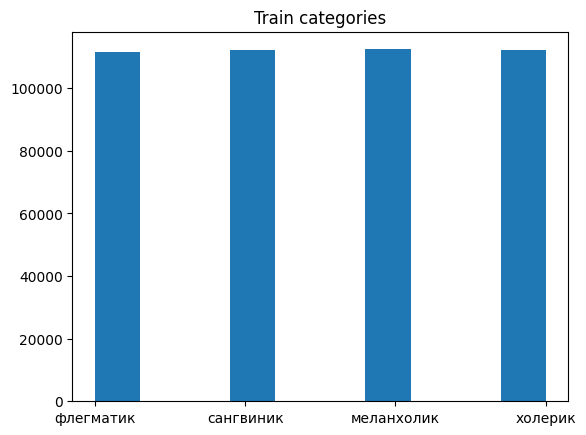

In [ ]:
plt.hist(data['personality'])
plt.title("Train categories")
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
X_train = data_train.drop("SeriousDlqin2yrs", axis=1)  # Удаляем столбец SeriousDlqin2yrs из X_train
y_train = data_train["SeriousDlqin2yrs"]  # Выбираем только столбец SeriousDlqin2yrs для y_train
#X_test= data_test.drop("SeriousDlqin2yrs", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 104025 to 121958
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            120000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 2   age                                   120000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 4   DebtRatio                             120000 non-null  float64
 5   MonthlyIncome                         120000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 7   NumberOfTimes90DaysLate               120000 non-null  int64  
 8   NumberRealEstateLoansOrLines          120000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 10  NumberOfDependents                    120000 non-null  float64
dtype

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Загрузка модели ELMo
elmo = hub.load("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz")



In [ ]:
# Установка обучаемости параметров модели
elmo.trainable = True

# Инициализация переменных
tf.compat.v1.disable_eager_execution()  # Отключение eager execution
sess = tf.compat.v1.Session()

# Инициализация переменных
sess.run(tf.compat.v1.global_variables_initializer())

# Получение эмбеддингов
inputs = ["это предложение", "word"]
outputs = elmo.signatures["default"](tf.constant(inputs))
embeddings = outputs["elmo"]
x= sess.run(embeddings)


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
# model.cuda()  # uncomment it if you have a GPU


In [ ]:

def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

print(embed_bert_cls('привет мир', model, tokenizer).shape)

(312,)


In [ ]:

file_path_test ="./dataset_token_labels.csv"
data = pd.read_csv(file_path_test, encoding='utf-8')
data.head()

,output,tokens,personality,tokenized_reviews
0,Конечно я хочу чтобы мир был лучше Но я верю ч...,"['мир', 'лучше', 'верю', 'путем', 'вдохновения...",флегматик,"[2, 1, 3, 4, 5, 6, 7, 8, 1, 9, 10, 11, 12, 13,..."
1,Я не очень хорошо знаю Мальдивы но в среднем И...,"['знаю', 'мальдивы', 'среднем', 'индийский', '...",флегматик,"[2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 1, 12]"
2,Пахра — река Москвы и Московской области правы...,"['пахра', 'река', 'москвы', 'московской', 'обл...",сангвиник,"[4, 2, 11, 24, 3, 12, 25, 26, 27, 28, 29, 13, ..."
3,Так какой княжескийто Князейто было много,"['княжескийто', 'князейто']",флегматик,"[1, 2, 3, 4, 5, 6]"
4,Да они очень активно делятся своей верой и поо...,"['активно', 'делятся', 'верой', 'поощряют', 'п...",меланхолик,"[9, 10, 2, 11, 12, 13, 14, 3, 15, 4, 16, 17, 5..."


In [ ]:
from datasets import load_dataset
import pandas as pd

import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")
# model.cuda()  # uncomment it if you have a GPU

file_path_test ="./dataset_token_labels.csv"
data = pd.read_csv(file_path_test, encoding='utf-8')
# Загрузка датасета
from datasets import Dataset

# Определение функции токенизации
def tokenize_function(batch):
    return tokenizer(batch["output"], padding="max_length", truncation=True)

# Преобразование pandas DataFrame в объект Dataset
dataset = Dataset.from_pandas(data)

# Применение функции токенизации к датасету с использованием метода map и параметра batched=True
tokenized_datasets = dataset.map(tokenize_function, batched=True)



Map:   0%|          | 0/448473 [00:00<?, ? examples/s]

In [ ]:
tokenized_data_pd = tokenized_datasets.to_pandas()
tokenized_data_pd.head()

,output,tokens,personality,tokenized_reviews,input_ids,token_type_ids,attention_mask
0,Конечно я хочу чтобы мир был лучше Но я верю ч...,"['мир', 'лучше', 'верю', 'путем', 'вдохновения...",флегматик,"[2, 1, 3, 4, 5, 6, 7, 8, 1, 9, 10, 11, 12, 13,...","[2, 290, 13199, 3312, 343, 333, 26704, 3771, 9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Я не очень хорошо знаю Мальдивы но в среднем И...,"['знаю', 'мальдивы', 'среднем', 'индийский', '...",флегматик,"[2, 3, 1, 4, 5, 6, 7, 8, 9, 10, 11, 1, 12]","[2, 311, 769, 6003, 14105, 319, 794, 920, 292,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Пахра — река Москвы и Московской области правы...,"['пахра', 'река', 'москвы', 'московской', 'обл...",сангвиник,"[4, 2, 11, 24, 3, 12, 25, 26, 27, 28, 29, 13, ...","[2, 14892, 753, 1232, 1, 5278, 10510, 320, 936...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Так какой княжескийто Князейто было много,"['княжескийто', 'князейто']",флегматик,"[1, 2, 3, 4, 5, 6]","[2, 5849, 22933, 15105, 776, 3881, 1439, 1026,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
4,Да они очень активно делятся своей верой и поо...,"['активно', 'делятся', 'верой', 'поощряют', 'п...",меланхолик,"[9, 10, 2, 11, 12, 13, 14, 3, 15, 4, 16, 17, 5...","[2, 9672, 3057, 6003, 10365, 4614, 14422, 4182...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
tokenized_datasets.to_csv('dataset_tokenizashion.csv', index=False) 

Creating CSV from Arrow format:   0%|          | 0/449 [00:00<?, ?ba/s]

2780010180

In [ ]:
file_path_test ="./dataset_token_labels.csv"
tokenized_datasets = pd.read_csv(file_path_test, encoding='utf-8')
tokenized_datasets.drop(columns=['tokenized_reviews', 'tokens'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение датасета на обучающий и временный наборы (80% на обучение, 20% на остальное)
train_data, temp_data = train_test_split(tokenized_datasets, test_size=0.2, random_state=42)

# Затем разделите временный набор на тестовый и валидационный наборы (по 50% от остаточных данных)
test_data, validation_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Теперь у вас есть train_data (обучающий набор), test_data (тестовый набор) и validation_data (валидационный



In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    "output_dir",  # Путь для сохранения модели и результатов обучения
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    logging_dir="logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)

trainer.train()


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("название_предобученной_модели", num_labels=num_labels)


from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="путь_к_директории_для_сохранения_чекпоинтов",
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    logging_dir="путь_к_директории_для_логирования",
)



import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": (predictions == labels).mean()}



from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)


1024

In [ ]:
trainer.train()


----

In [5]:
file_path_test ="./dataset_token_labels.csv"
tokenized_datasets = pd.read_csv(file_path_test, encoding='utf-8')
tokenized_datasets.drop(columns=['tokenized_reviews', 'tokens'], inplace=True)

import torch
from transformers import AutoTokenizer, AutoModel
token = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny")

In [6]:
tokenized_datasets

,output,personality
0,Конечно я хочу чтобы мир был лучше Но я верю ч...,флегматик
1,Я не очень хорошо знаю Мальдивы но в среднем И...,флегматик
2,Пахра — река Москвы и Московской области правы...,сангвиник
3,Так какой княжескийто Князейто было много,флегматик
4,Да они очень активно делятся своей верой и поо...,меланхолик
...,...,...
448468,Конечно это очень интересная тема Пирамиды в Г...,сангвиник
448469,Они уже забыли что их тело священный храм а п...,флегматик
448470,Это не только поможет тебе открыть новые гастр...,сангвиник
448471,Какую музыку вы любите,сангвиник


In [7]:
STOPWORDS  = stopwords.words('english') + ['im']
STOPWORDS.remove('not')
STOPWORDS.remove('no')

lemmatizer = WordNetLemmatizer()

#### Функция очистки и лемматизации текста
def clean_text(text):
  #очистить текст от тегов html и привести к нижнему регистру
  text = BeautifulSoup(text).get_text().lower()

  #очистить текст от ссылок html
  #text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)

  #очистить текст от всех символов кроме букв латинского алфавита
  #text = re.sub("[^a-z]", " ", text)

  #разбить текст на слова
  #text_words = text.split()

  #выполнить лематизацию текста и удалить стоп-слова
  #result_words = [lemmatizer.lemmatize(word) for word in text_words if not word in STOPWORDS]
    
  return text

In [8]:
tokenized_datasets['output'] = tokenized_datasets['output'].apply(lambda x: clean_text(x))

In [9]:
tokenized_datasets

,output,personality
0,конечно я хочу чтобы мир был лучше но я верю ч...,флегматик
1,я не очень хорошо знаю мальдивы но в среднем и...,флегматик
2,пахра — река москвы и московской области правы...,сангвиник
3,так какой княжескийто князейто было много,флегматик
4,да они очень активно делятся своей верой и поо...,меланхолик
...,...,...
448468,конечно это очень интересная тема пирамиды в г...,сангвиник
448469,они уже забыли что их тело священный храм а п...,флегматик
448470,это не только поможет тебе открыть новые гастр...,сангвиник
448471,какую музыку вы любите,сангвиник


In [10]:
from sklearn.preprocessing import LabelEncoder
labeles = LabelEncoder()
labels = labeles.fit_transform(tokenized_datasets['personality'])

In [11]:
from sklearn.model_selection import train_test_split
id2label = {
   0:'флегматик', 1:'меланхолик', 2:'сангвиник', 3:'холерик'
}
label2id = {
    0:'флегматик', 1:'меланхолик', 2:'сангвиник', 3:'холерик'
}


X_train, X_test, y_train, y_test = train_test_split(tokenized_datasets['output'], labels, test_size=0.2, random_state=42)

In [12]:
from datasets import Dataset

import pandas as pd
data = pd.DataFrame({'text': X_train, 'label': y_train})
data_test = pd.DataFrame({'text': X_test, 'label': y_test})


dataset_train = Dataset.from_pandas(data)
dataset_test = Dataset.from_pandas(data_test)

In [13]:
class TokenizerWrapper:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
    
    def tokenize_function(self, examples):
        return self.tokenizer(
            examples["text"],
            padding="max_length",
            max_length=128,#128
            truncation=True,
        )

In [14]:
tokenizer_wrapper = TokenizerWrapper(token)

In [15]:
BATCH_SIZE = 32
NUM_PROCS = 32
LR = 0.00005
EPOCHS = 10

In [16]:
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(labels)
class_weights = compute_class_weight('balanced', classes=classes, y=labels)
class_weights = torch.tensor(class_weights)


In [17]:
tokenized_train = dataset_train.map(
    tokenizer_wrapper.tokenize_function, 
    batched=True,
    batch_size=BATCH_SIZE,
    num_proc=1
)


Map:   0%|          | 0/358778 [00:00<?, ? examples/s]

In [18]:
tokenized_test = dataset_test.map(
    tokenizer_wrapper.tokenize_function, 
    batched=True,
    batch_size=BATCH_SIZE,
    num_proc=1
)

Map:   0%|          | 0/89695 [00:00<?, ? examples/s]

In [19]:
from datasets import load_dataset
from transformers import (
    AutoTokenizer, 
    DataCollatorWithPadding,
    AutoModelForSequenceClassification, 
    TrainingArguments, 
    Trainer,
    pipeline
)
import numpy as np

In [20]:
import evaluate
accuracy = evaluate.load('accuracy')


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)


model = AutoModelForSequenceClassification.from_pretrained(
    "google/bert_uncased_L-2_H-128_A-2",#"google/mobilebert-uncased",  "google/bert_uncased_L-2_H-128_A-2"
    num_labels=4, 
    id2label=id2label, 
    label2id=label2id
)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/bert_uncased_L-2_H-128_A-2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:


total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")



batch_size = 16
training_args = TrainingArguments(
    output_dir="bert_uncased_L-2_H-128_A-2",
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    #fp16=True
)




4,386,436 total parameters.
4,386,436 training parameters.


In [22]:
class_weights = class_weights.to(torch.float)


In [23]:

import torch.nn.functional as F
class_weights=class_weights.to("cuda")
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = F.cross_entropy(logits, labels, weight=class_weights)
        return (loss, outputs) if return_outputs else loss
    






In [24]:
data_collator = DataCollatorWithPadding(tokenizer=token)

In [25]:
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=token,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [26]:
history = trainer.train()

  0%|          | 0/224240 [00:00<?, ?it/s]

{'loss': 1.3915, 'grad_norm': 1.211311936378479, 'learning_rate': 0.0001995540492329647, 'epoch': 0.02}
{'loss': 1.3906, 'grad_norm': 1.9153090715408325, 'learning_rate': 0.00019910809846592937, 'epoch': 0.04}
{'loss': 1.3919, 'grad_norm': 1.8487228155136108, 'learning_rate': 0.00019866214769889405, 'epoch': 0.07}
{'loss': 1.3905, 'grad_norm': 2.150355100631714, 'learning_rate': 0.00019821619693185873, 'epoch': 0.09}
{'loss': 1.3903, 'grad_norm': 2.256033420562744, 'learning_rate': 0.00019777024616482341, 'epoch': 0.11}
{'loss': 1.3899, 'grad_norm': 1.7838871479034424, 'learning_rate': 0.0001973242953977881, 'epoch': 0.13}
{'loss': 1.3899, 'grad_norm': 2.3615686893463135, 'learning_rate': 0.00019687834463075278, 'epoch': 0.16}
{'loss': 1.3884, 'grad_norm': 1.781658411026001, 'learning_rate': 0.00019643239386371746, 'epoch': 0.18}
{'loss': 1.3899, 'grad_norm': 1.2165708541870117, 'learning_rate': 0.00019598644309668214, 'epoch': 0.2}
{'loss': 1.3903, 'grad_norm': 1.6550554037094116, 'le

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.3881062269210815, 'eval_accuracy': 0.2499693405429511, 'eval_runtime': 55.9803, 'eval_samples_per_second': 1602.26, 'eval_steps_per_second': 100.142, 'epoch': 1.0}
{'loss': 1.3876, 'grad_norm': 1.3870922327041626, 'learning_rate': 0.00017993221548341063, 'epoch': 1.0}
{'loss': 1.3871, 'grad_norm': 0.958770751953125, 'learning_rate': 0.00017948626471637533, 'epoch': 1.03}
{'loss': 1.3875, 'grad_norm': 1.663558006286621, 'learning_rate': 0.00017904031394934, 'epoch': 1.05}
{'loss': 1.3874, 'grad_norm': 0.9129471778869629, 'learning_rate': 0.0001785943631823047, 'epoch': 1.07}
{'loss': 1.3878, 'grad_norm': 1.2051888704299927, 'learning_rate': 0.00017814841241526935, 'epoch': 1.09}
{'loss': 1.3871, 'grad_norm': 0.7623627185821533, 'learning_rate': 0.00017770246164823406, 'epoch': 1.11}
{'loss': 1.3872, 'grad_norm': 0.8182543516159058, 'learning_rate': 0.0001772565108811987, 'epoch': 1.14}
{'loss': 1.3866, 'grad_norm': 0.9335556626319885, 'learning_rate': 0.00017681056011416

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.386330246925354, 'eval_accuracy': 0.2499693405429511, 'eval_runtime': 54.973, 'eval_samples_per_second': 1631.618, 'eval_steps_per_second': 101.977, 'epoch': 2.0}
{'loss': 1.3869, 'grad_norm': 0.774156928062439, 'learning_rate': 0.00015986443096682127, 'epoch': 2.01}
{'loss': 1.3867, 'grad_norm': 0.8452780842781067, 'learning_rate': 0.00015941848019978595, 'epoch': 2.03}
{'loss': 1.3864, 'grad_norm': 0.5903506875038147, 'learning_rate': 0.00015897252943275063, 'epoch': 2.05}
{'loss': 1.3868, 'grad_norm': 0.5762022137641907, 'learning_rate': 0.00015852657866571531, 'epoch': 2.07}
{'loss': 1.3865, 'grad_norm': 0.7186887860298157, 'learning_rate': 0.00015808062789868, 'epoch': 2.1}
{'loss': 1.3867, 'grad_norm': 0.6974509358406067, 'learning_rate': 0.00015763467713164468, 'epoch': 2.12}
{'loss': 1.387, 'grad_norm': 0.6667967438697815, 'learning_rate': 0.00015718872636460936, 'epoch': 2.14}
{'loss': 1.3868, 'grad_norm': 0.6854256391525269, 'learning_rate': 0.0001567427755975

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.3863738775253296, 'eval_accuracy': 0.25005853169072967, 'eval_runtime': 54.9808, 'eval_samples_per_second': 1631.387, 'eval_steps_per_second': 101.963, 'epoch': 3.0}
{'loss': 1.3869, 'grad_norm': 0.5881686210632324, 'learning_rate': 0.0001397966464502319, 'epoch': 3.01}
{'loss': 1.3866, 'grad_norm': 0.6547052264213562, 'learning_rate': 0.0001393506956831966, 'epoch': 3.03}
{'loss': 1.3866, 'grad_norm': 0.543296754360199, 'learning_rate': 0.00013890474491616125, 'epoch': 3.05}
{'loss': 1.3871, 'grad_norm': 0.4506433308124542, 'learning_rate': 0.00013845879414912596, 'epoch': 3.08}
{'loss': 1.3868, 'grad_norm': 0.6988069415092468, 'learning_rate': 0.0001380128433820906, 'epoch': 3.1}
{'loss': 1.3868, 'grad_norm': 0.6926823854446411, 'learning_rate': 0.00013756689261505532, 'epoch': 3.12}
{'loss': 1.3868, 'grad_norm': 0.5356084108352661, 'learning_rate': 0.00013712094184801997, 'epoch': 3.14}
{'loss': 1.3867, 'grad_norm': 0.41961613297462463, 'learning_rate': 0.00013667499

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.386454463005066, 'eval_accuracy': 0.2499693405429511, 'eval_runtime': 54.9424, 'eval_samples_per_second': 1632.528, 'eval_steps_per_second': 102.034, 'epoch': 4.0}
{'loss': 1.3865, 'grad_norm': 0.5964686274528503, 'learning_rate': 0.00011972886193364252, 'epoch': 4.01}
{'loss': 1.3868, 'grad_norm': 0.46423110365867615, 'learning_rate': 0.00011928291116660721, 'epoch': 4.04}
{'loss': 1.3866, 'grad_norm': 0.44209975004196167, 'learning_rate': 0.00011883696039957188, 'epoch': 4.06}
{'loss': 1.3865, 'grad_norm': 0.39730894565582275, 'learning_rate': 0.00011839100963253657, 'epoch': 4.08}
{'loss': 1.3866, 'grad_norm': 0.3808248043060303, 'learning_rate': 0.00011794505886550124, 'epoch': 4.1}
{'loss': 1.3867, 'grad_norm': 0.5077800154685974, 'learning_rate': 0.00011749910809846594, 'epoch': 4.13}
{'loss': 1.3864, 'grad_norm': 0.8229114413261414, 'learning_rate': 0.0001170531573314306, 'epoch': 4.15}
{'loss': 1.3866, 'grad_norm': 0.4920678734779358, 'learning_rate': 0.00011660

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.386456847190857, 'eval_accuracy': 0.2499693405429511, 'eval_runtime': 56.0434, 'eval_samples_per_second': 1600.455, 'eval_steps_per_second': 100.03, 'epoch': 5.0}
{'loss': 1.3868, 'grad_norm': 0.42785927653312683, 'learning_rate': 9.966107741705316e-05, 'epoch': 5.02}
{'loss': 1.3864, 'grad_norm': 0.4335012137889862, 'learning_rate': 9.921512665001784e-05, 'epoch': 5.04}
{'loss': 1.3865, 'grad_norm': 0.4729599952697754, 'learning_rate': 9.876917588298252e-05, 'epoch': 5.06}
{'loss': 1.3864, 'grad_norm': 0.4161396324634552, 'learning_rate': 9.83232251159472e-05, 'epoch': 5.08}
{'loss': 1.3866, 'grad_norm': 0.44964930415153503, 'learning_rate': 9.787727434891189e-05, 'epoch': 5.11}
{'loss': 1.3865, 'grad_norm': 0.5446223616600037, 'learning_rate': 9.743132358187657e-05, 'epoch': 5.13}
{'loss': 1.3864, 'grad_norm': 0.3919900953769684, 'learning_rate': 9.698537281484125e-05, 'epoch': 5.15}
{'loss': 1.3866, 'grad_norm': 0.33465373516082764, 'learning_rate': 9.653942204780593

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.3862980604171753, 'eval_accuracy': 0.25005853169072967, 'eval_runtime': 54.8336, 'eval_samples_per_second': 1635.767, 'eval_steps_per_second': 102.237, 'epoch': 6.0}
{'loss': 1.3864, 'grad_norm': 0.3658311069011688, 'learning_rate': 7.959329290046379e-05, 'epoch': 6.02}
{'loss': 1.3868, 'grad_norm': 0.4505120515823364, 'learning_rate': 7.914734213342847e-05, 'epoch': 6.04}
{'loss': 1.3866, 'grad_norm': 0.3263239860534668, 'learning_rate': 7.870139136639315e-05, 'epoch': 6.06}
{'loss': 1.3864, 'grad_norm': 0.3523302674293518, 'learning_rate': 7.825544059935784e-05, 'epoch': 6.09}
{'loss': 1.3865, 'grad_norm': 0.40178096294403076, 'learning_rate': 7.780948983232252e-05, 'epoch': 6.11}
{'loss': 1.3865, 'grad_norm': 0.3024914562702179, 'learning_rate': 7.73635390652872e-05, 'epoch': 6.13}
{'loss': 1.3865, 'grad_norm': 0.5024065375328064, 'learning_rate': 7.691758829825188e-05, 'epoch': 6.15}
{'loss': 1.3862, 'grad_norm': 0.3639470636844635, 'learning_rate': 7.64716375312165

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.3864017724990845, 'eval_accuracy': 0.25035955181448244, 'eval_runtime': 54.9649, 'eval_samples_per_second': 1631.861, 'eval_steps_per_second': 101.992, 'epoch': 7.0}
{'loss': 1.3863, 'grad_norm': 0.562050998210907, 'learning_rate': 5.997145915090975e-05, 'epoch': 7.0}
{'loss': 1.3863, 'grad_norm': 0.5365480184555054, 'learning_rate': 5.952550838387442e-05, 'epoch': 7.02}
{'loss': 1.3864, 'grad_norm': 0.4149349629878998, 'learning_rate': 5.90795576168391e-05, 'epoch': 7.05}
{'loss': 1.3866, 'grad_norm': 0.44617360830307007, 'learning_rate': 5.863360684980378e-05, 'epoch': 7.07}
{'loss': 1.3863, 'grad_norm': 0.3934263288974762, 'learning_rate': 5.818765608276846e-05, 'epoch': 7.09}
{'loss': 1.3864, 'grad_norm': 0.4084547162055969, 'learning_rate': 5.774170531573314e-05, 'epoch': 7.11}
{'loss': 1.3862, 'grad_norm': 0.6097967028617859, 'learning_rate': 5.729575454869782e-05, 'epoch': 7.14}
{'loss': 1.3864, 'grad_norm': 0.4408062994480133, 'learning_rate': 5.68498037816625e-

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.386383295059204, 'eval_accuracy': 0.24961257595183678, 'eval_runtime': 55.1848, 'eval_samples_per_second': 1625.356, 'eval_steps_per_second': 101.586, 'epoch': 8.0}
{'loss': 1.3864, 'grad_norm': 0.340594083070755, 'learning_rate': 3.990367463432037e-05, 'epoch': 8.0}
{'loss': 1.3865, 'grad_norm': 0.31533151865005493, 'learning_rate': 3.9457723867285054e-05, 'epoch': 8.03}
{'loss': 1.3864, 'grad_norm': 0.3149881064891815, 'learning_rate': 3.9011773100249735e-05, 'epoch': 8.05}
{'loss': 1.3865, 'grad_norm': 0.347040057182312, 'learning_rate': 3.8565822333214416e-05, 'epoch': 8.07}
{'loss': 1.386, 'grad_norm': 0.330790251493454, 'learning_rate': 3.81198715661791e-05, 'epoch': 8.09}
{'loss': 1.3863, 'grad_norm': 0.5143473148345947, 'learning_rate': 3.767392079914378e-05, 'epoch': 8.12}
{'loss': 1.3864, 'grad_norm': 0.30482399463653564, 'learning_rate': 3.722797003210846e-05, 'epoch': 8.14}
{'loss': 1.3864, 'grad_norm': 0.3981519639492035, 'learning_rate': 3.678201926507314e

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.386304259300232, 'eval_accuracy': 0.24961257595183678, 'eval_runtime': 55.1986, 'eval_samples_per_second': 1624.952, 'eval_steps_per_second': 101.561, 'epoch': 9.0}
{'loss': 1.3864, 'grad_norm': 0.3009043335914612, 'learning_rate': 1.9835890117731004e-05, 'epoch': 9.01}
{'loss': 1.3864, 'grad_norm': 0.3983422517776489, 'learning_rate': 1.9389939350695685e-05, 'epoch': 9.03}
{'loss': 1.3863, 'grad_norm': 0.2768724262714386, 'learning_rate': 1.8943988583660366e-05, 'epoch': 9.05}
{'loss': 1.3863, 'grad_norm': 0.47840163111686707, 'learning_rate': 1.8498037816625046e-05, 'epoch': 9.08}
{'loss': 1.3863, 'grad_norm': 0.29182231426239014, 'learning_rate': 1.8052087049589724e-05, 'epoch': 9.1}
{'loss': 1.3862, 'grad_norm': 0.34754934906959534, 'learning_rate': 1.7606136282554405e-05, 'epoch': 9.12}
{'loss': 1.3865, 'grad_norm': 0.31682607531547546, 'learning_rate': 1.7160185515519086e-05, 'epoch': 9.14}
{'loss': 1.3863, 'grad_norm': 0.2479284554719925, 'learning_rate': 1.67142

  0%|          | 0/5606 [00:00<?, ?it/s]

{'eval_loss': 1.3863000869750977, 'eval_accuracy': 0.25035955181448244, 'eval_runtime': 54.8768, 'eval_samples_per_second': 1634.478, 'eval_steps_per_second': 102.156, 'epoch': 10.0}
{'train_runtime': 14090.1045, 'train_samples_per_second': 254.631, 'train_steps_per_second': 15.915, 'train_loss': 1.3867816420142411, 'epoch': 10.0}


In [43]:
PATH = "model4.pth"

# Сохранение всей модели

trainer.save_model(PATH)



AttributeError: 'TrainOutput' object has no attribute 'save_model'

In [42]:
from transformers import AutoModelForSequenceClassification

# Загрузка модели с помощью AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(PATH)

# Убедитесь, что модель находится в режиме evaluation
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12, e